In [1]:
# Cacs buoc xu li du lieu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('https://raw.githubusercontent.com/CodexploreRepo/data-science/main/Code/P01_Pre_Processing/Data.csv', sep=',')
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
# thay the du lieu thiet
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [4]:
for col in data_df.columns:
  missing_data= data_df[col].isna().sum()
  missing_percent = missing_data/len(data_df)*100
  print(f"Column:{col} has {missing_percent}% missing data")

Column:Country has 0.0% missing data
Column:Age has 10.0% missing data
Column:Salary has 10.0% missing data
Column:Purchased has 0.0% missing data


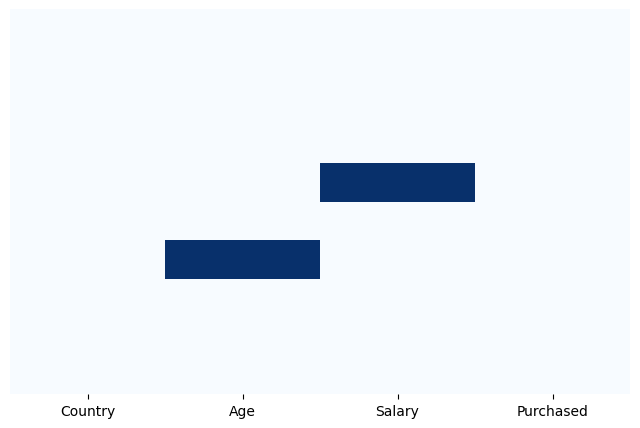

In [5]:
fig, ax= plt.subplots(figsize=(8, 5))
sns.heatmap(data_df.isna(), cmap="Blues", cbar=False, yticklabels=False); # flae loai bo ten co


In [6]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [7]:
X= data_df.iloc[:, :-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [8]:
Y= data_df.iloc[:, -1].values #value ko co cá dang lable
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [9]:
from sklearn.impute import SimpleImputer #thu vien simple replace thay the bang 1 method quy dinh
# vgia tri nao la nan, mean la gi atri trung binh trong column tuong ung
# fix du lieu chi lay cot 1 va cot so 2 neen 1:3 la 1 va 2
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, 1:3])
X[:, 1:3] =imputer.transform(X[:, 1:3]) # sau khi tay the min tung cot 1
X


array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [25]:
# ma hoa du lieu danh muc convert chuoi thanh so, can chuyen chuoi thanh so ma hoa de su dung

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder # module max hoa
# so [0] la cot muon trasform, remainder thi cot so 1 va cot so 2 khong lam gi ca
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder="passthrough")
X=ct.fit_transform(X)
# ma hoa du lieu

In [26]:
X

array([[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 40.0,
        63777.77777777778],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 38.77777777777778,
        52000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]],
      dtype=object)

In [20]:

# # ma hoa yes, no
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y =le.fit_transform(Y)
y


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [29]:
  from sklearn.model_selection import train_test_split
  np.random.seed(42)

  X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [30]:
X_train # lay 80%

array([[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 40.0,
        63777.77777777778],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 38.77777777777778,
        52000.0]], dtype=object)

In [31]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [33]:
X_test

array([[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 27.0, 48000.0]],
      dtype=object)

In [34]:
y_test

array([0, 1])

In [ ]:
# du 35 voi 58 000 ve scale co gian giu liwu

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 9:]=sc.fit_transform(X_train[:, 9:])

In [36]:
X_train # fix gia tri ve 0 1

array([[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, -0.7529426005471072,
        -0.6260377781240918],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.008453807952985,
        1.0130429500553495],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.7912966561752484,
        1.8325833141450703],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, -1.7314961608249362,
        -1.0943465576039322],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, -0.3615211764359756,
        0.42765697570554906],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.22561095973072184,
        0.05040823668012247],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        -0.16581046438040975, -0.27480619351421154],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        -0.013591021670525094, -1.3285009473438525]], dtype=object)

In [37]:
X_test[:, 9:] = sc.transform(X_test[:3, 9:])

In [38]:
X_test

array([[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.1827180802863797,
        2.3008920936249107],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, -2.3186282969916334,
        -1.7968097268236927]], dtype=object)